In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn import metrics

from IPython.display import Image
from subprocess import call
from scipy import stats 

import pydotplus

/home/laurent/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

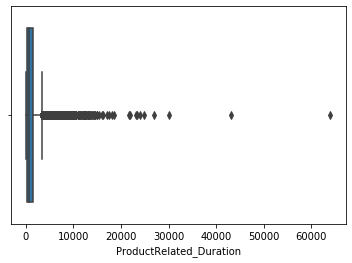

In [6]:
sb.boxplot(x=df['ProductRelated_Duration'] )

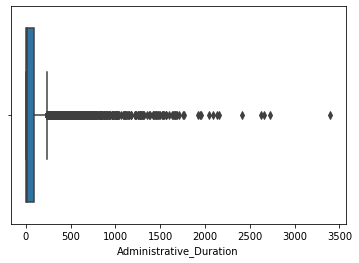

In [7]:
sb.boxplot(x=df['Administrative_Duration'])

# Data Preprocessing

In [8]:
df = df.drop_duplicates()

In [9]:
ADQ1 = np.percentile(df.Administrative_Duration, 25, interpolation = 'midpoint')  
ADQ3 = np.percentile(df.Administrative_Duration, 75, interpolation = 'midpoint')  

ADIQR = ADQ3 - ADQ1  
ADlow_lim = ADQ1 - 1.5 * ADIQR 
ADup_lim = ADQ3 + 1.5 * ADIQR

In [10]:
ADup_lim

236.75

In [11]:
PRDQ1 = np.percentile(df.ProductRelated_Duration , 25, interpolation = 'midpoint')  
PRDQ3 = np.percentile(df.ProductRelated_Duration, 75, interpolation = 'midpoint')  
  
PRDIQR = PRDQ3 - PRDQ1  
PRDlow_lim = PRDQ1 - 1.5 * PRDIQR 
PRDup_lim = PRDQ3 + 1.5 * PRDIQR

In [12]:
df = df[df.Administrative_Duration <= ADup_lim]

In [13]:
df = df[df.ProductRelated_Duration <= PRDup_lim]

In [14]:
df = df.apply(LabelEncoder().fit_transform)

# Algorithms

In [35]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [34]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

rf=RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train,Y_train)

Y_pred_RF = rf.predict(X_test)
Y_pred_rounded=np.around(Y_pred_RF)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rounded))

Accuracy: 0.9163131507905901


In [42]:
#df = df.apply(LabelEncoder().fit_transform)

In [43]:
estimator = rf.estimators_[1]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names=['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [51]:
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train,Y_train) 
Y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8746786632390745


In [59]:
gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, Y_train).predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_NB))

Accuracy: 0.8605398457583547


In [75]:
knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train, Y_train)

y_pred_KNN = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_KNN))

Accuracy: 0.9055269922879178


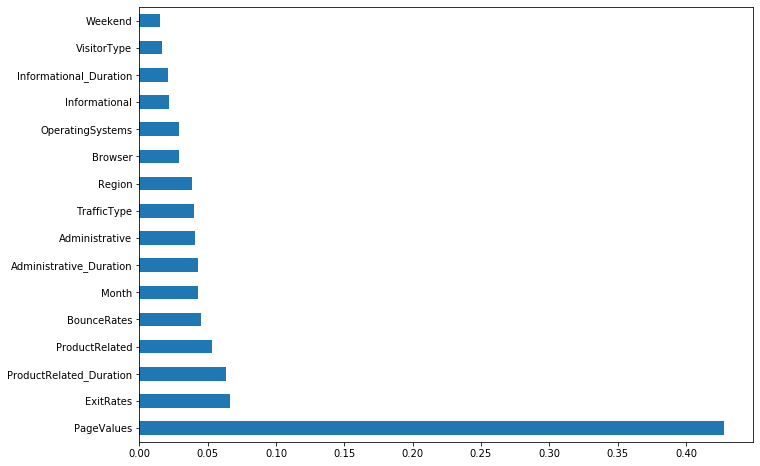

In [47]:
model = ExtraTreesClassifier()
model.fit(X,Y) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh', figsize=(11,8))
plt.show()

# Algorithms using 10 most important attributes.

In [91]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [94]:
choosenColumns = ['Administrative','Administrative_Duration','ProductRelated','ProductRelated_Duration',
                  'BounceRates','ExitRates','PageValues','Month','Region','TrafficType']

In [124]:
X=df[choosenColumns]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

rf=RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train,Y_train)

Y_pred_RF = rf.predict(X_test)
Y_pred_rounded=np.around(Y_pred_RF)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_rounded))

Accuracy: 0.9267352185089974


In [119]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, Y_train)

y_pred_KNN = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_KNN))

Accuracy: 0.9080976863753213


In [120]:
X=df[choosenColumns]
Y=df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

gnb = GaussianNB()
y_pred_NB = gnb.fit(X_train, Y_train).predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_NB))

Accuracy: 0.8849614395886889


In [92]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,Y_train) 
Y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8733933161953727
